In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

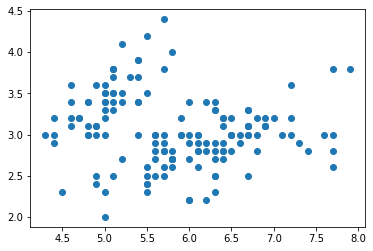

In [309]:
X, _ = load_iris(return_X_y = True)
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Hierarchical Clustering

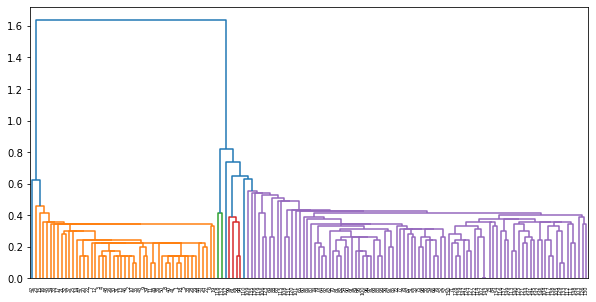

[1 2 3 4 5 6 7]


In [310]:
plt.figure(figsize=(10,5))
Z = hierarchy.linkage(X)
dn = hierarchy.dendrogram(Z, labels=np.arange(150)+1, color_threshold=0.6)
plt.show()

g = hierarchy.fcluster(Z, criterion='distance', t=0.6)
print(np.unique(g))

# K Means

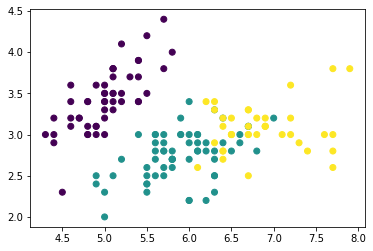

In [311]:
model = KMeans(n_clusters = 3)
g = model.fit_predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = g)
plt.show()

# K Mixture

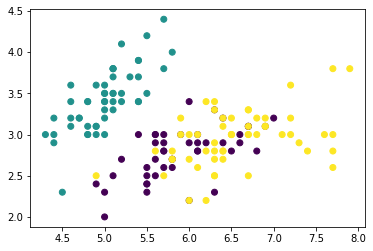

In [312]:
model = GaussianMixture(n_components = 3)
g = model.fit_predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = g)
plt.show()

# Activity

In [313]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

## Image

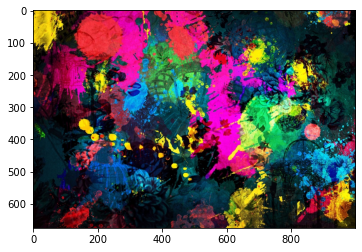

(675, 1000, 3)

In [314]:
img = cv2.imread('Colors.jpg')
#img = cv2.imread('Landscape.jpeg')
img = cv2.cvtColor(img, code = cv2.COLOR_BGR2RGB) #convertir color [viene en cv]
plt.figure()
plt.imshow(img)
plt.show()
img.shape

## Reshape

In [315]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
nrows, ncols, nch = img.shape
xHsv = np.reshape(hsv, (nrows*ncols, nch))

## Clustering

### KMeans

In [316]:
modelKMeans = KMeans(n_clusters = 3)
gOne = modelKMeans.fit_predict(xHsv)

### KMixture

In [317]:
modelKMixture = GaussianMixture(n_components = 3)
gTwo = modelKMixture.fit_predict(xHsv)

## Set same color

In [318]:
colors = np.unique(gOne)
imgOne = xHsv
for i in colors:
    imgOne[gOne == i, 0] = np.mean(xHsv[gOne == i, 0])
    imgOne[gOne == i, 1] = np.mean(xHsv[gOne == i, 1])
    imgOne[gOne == i, 2] = np.mean(xHsv[gOne == i, 2])

In [319]:
colors = np.unique(gTwo)
imgTwo = xHsv
for i in colors:
    imgTwo[gTwo == i, 0] = np.mean(xHsv[gTwo == i, 0])
    imgTwo[gTwo == i, 1] = np.mean(xHsv[gTwo == i, 1])
    imgTwo[gTwo == i, 2] = np.mean(xHsv[gTwo == i, 2])

## Reshape

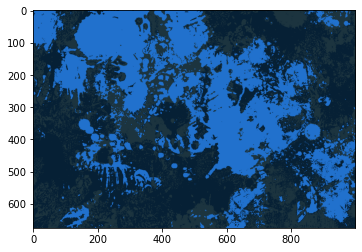

In [320]:
imgOne = np.reshape(imgOne, (nrows, ncols, 3))
imgOne = cv2.cvtColor(imgOne, code = cv2.COLOR_HSV2RGB)
plt.figure()
plt.imshow(imgOne)
plt.show()

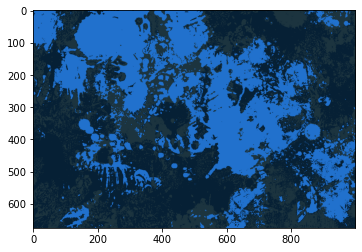

In [321]:
imgTwo = np.reshape(imgTwo, (nrows, ncols, 3))
imgTwo = cv2.cvtColor(imgTwo, code = cv2.COLOR_HSV2RGB)
plt.figure()
plt.imshow(imgTwo)
plt.show()